In [ ]:
pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 87.6 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib

**지역별 영화관 매출액 데이터**

**전처리 단계**

In [ ]:
import pandas as pd

df = pd.DataFrame(pd.read_csv("영화 관람 데이터.csv"))

#데이터 정보 확인(null값, 타입)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3689 entries, 0 to 3688
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   BASE_YEAR                      3689 non-null   int64  
 1   BASE_QUARTER                   3689 non-null   int64  
 2   BASE_MT                        3689 non-null   int64  
 3   BASE_DAY                       3689 non-null   int64  
 4   MT_WEEK_ODR                    3689 non-null   int64  
 5   WEEK_ODR                       3689 non-null   int64  
 6   CTPRVN_NM                      3689 non-null   object 
 7   KOREA_MOVIE_ADNC_CO            3689 non-null   int64  
 8   OVSEA_MOVIE_ADNC_CO            3689 non-null   int64  
 9   MOVIE_ADNC_CO                  3689 non-null   int64  
 10  KOREA_MOVIE_SALES_PRICE        3689 non-null   int64  
 11  OVSEA_MOVIE_SALES_PRICE        3689 non-null   int64  
 12  MOVIE_SALES_PRICE              3689 non-null   i

In [ ]:
#drop() 함수를 사용해서 변수 버림
df = df.drop(['BASE_QUARTER', 'BASE_MT', 'BASE_DAY', 'MT_WEEK_ODR', 'WEEK_ODR',
              'KOREA_MOVIE_ADNC_CO', 'OVSEA_MOVIE_ADNC_CO', 'MOVIE_ADNC_CO',
              'OVSEA_MOVIE_SALES_PRICE', 'MOVIE_SALES_PRICE', 'DAY_AVRG_KOREA_MOVIE_SCRNG_CO',
              'DAY_AVRG_OVSEA_MOVIE_SCRNG_CO', 'DAY_AVRG_MOVIE_SCRNG_CO'], axis=1)
df

,BASE_YEAR,CTPRVN_NM,KOREA_MOVIE_SALES_PRICE
0,2019,강원도,227830300
1,2019,강원도,460859470
2,2019,강원도,441536430
3,2019,강원도,880833990
4,2019,강원도,1231994660
...,...,...,...
3684,2023,전라남도,105617701
3685,2023,전라북도,122613172
3686,2023,제주특별자치도,51957500
3687,2023,충청남도,151039992


In [ ]:
#BASE_YEAR에서 2022년을 제외한 나머지 년도는 다 버림 처리
df2022 = df[df['BASE_YEAR'] == 2022]
df2022

,BASE_YEAR,CTPRVN_NM,KOREA_MOVIE_SALES_PRICE
1836,2022,강원도,37196300
1888,2022,경기도,447887140
1940,2022,경상남도,79969210
1992,2022,경상북도,58728310
2044,2022,광주광역시,67754980
...,...,...,...
3547,2022,충청북도,388898020
3548,2022,충청북도,460788605
3549,2022,충청북도,371500507
3550,2022,충청북도,188344426


In [ ]:
#CTPRVN_NM을 기준으로 그룹화해서 KOREA_MOVIE_SALES_PRICE의 합을 합친 다음에 index를 새로 만듦
grouped2022 = df2022.groupby('CTPRVN_NM')['KOREA_MOVIE_SALES_PRICE'].sum().reset_index()
grouped2022

,CTPRVN_NM,KOREA_MOVIE_SALES_PRICE
0,강원도,14751199847
1,경기도,157799029387
2,경상남도,32146601617
3,경상북도,21925647750
4,광주광역시,21346906103
5,대구광역시,28864879087
6,대전광역시,21588242525
7,부산광역시,43523197784
8,서울특별시,149631559126
9,세종특별자치시,3761807087


**분석 단계**

In [ ]:
#앞에서 만든 그룹화 데이터를 KOREA_MOVIE_SALES_PRICE를 기준으로 차순 정리
new_df2022 = grouped2022.sort_values('KOREA_MOVIE_SALES_PRICE', ascending=False).reset_index(drop=True)
new_df2022

,CTPRVN_NM,KOREA_MOVIE_SALES_PRICE
0,경기도,157799029387
1,서울특별시,149631559126
2,부산광역시,43523197784
3,인천광역시,33335366296
4,경상남도,32146601617
5,대구광역시,28864879087
6,경상북도,21925647750
7,대전광역시,21588242525
8,충청남도,21528995461
9,광주광역시,21346906103


**시각화 단계**

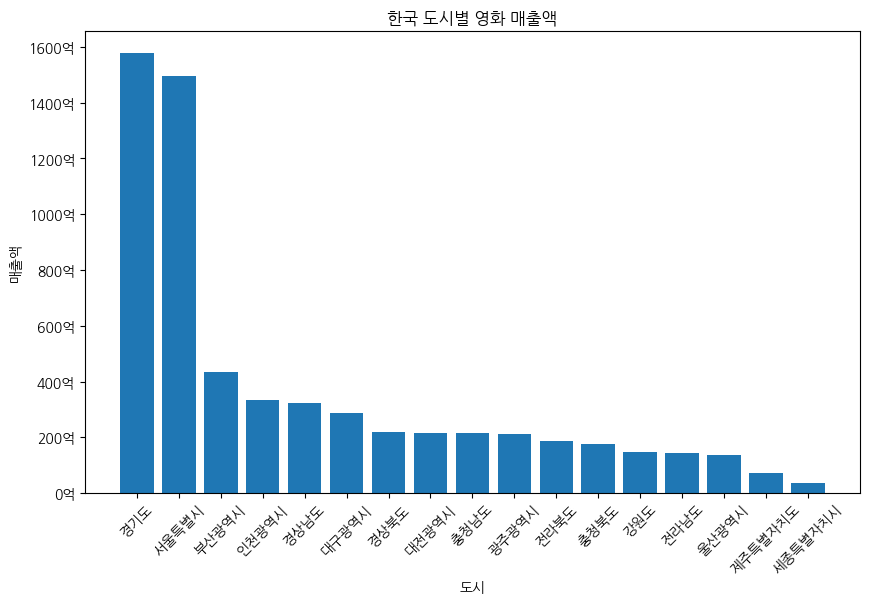

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(new_df2022['CTPRVN_NM'], new_df2022['KOREA_MOVIE_SALES_PRICE'])
plt.xlabel('도시')
plt.ylabel('매출액')
plt.title('한국 도시별 영화 매출액')
plt.xticks(rotation=45)

# y축 레이블을 대략적인 형식으로 변환하는 함수
def sales_formatter(x, pos):
    if x >= 1e12:
        return '{:.0f}조'.format(x / 1e12)
    else:
        return '{:.0f}억'.format(x / 1e8)

# y축 레이블 형식 지정
formatter = ticker.FuncFormatter(sales_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

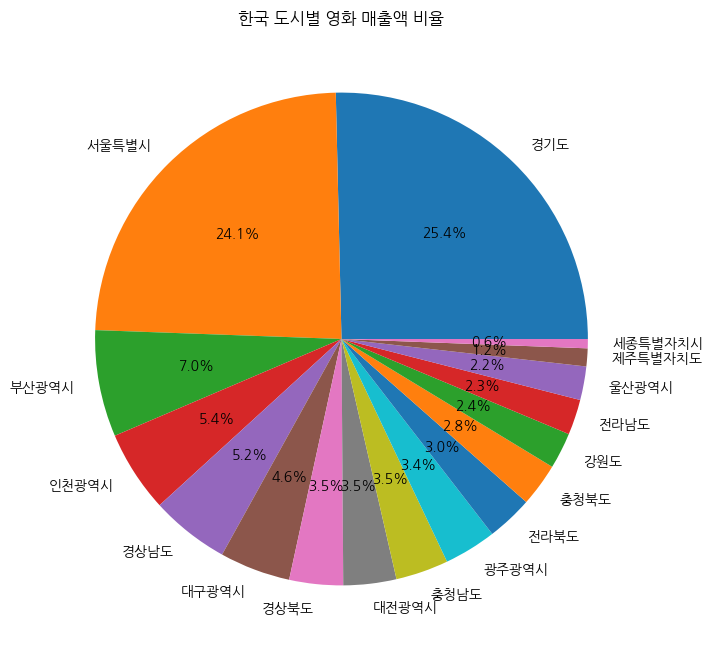

In [ ]:
# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(new_df2022['KOREA_MOVIE_SALES_PRICE'], labels=new_df2022['CTPRVN_NM'], autopct='%1.1f%%')
plt.title('한국 도시별 영화 매출액 비율')
plt.show()

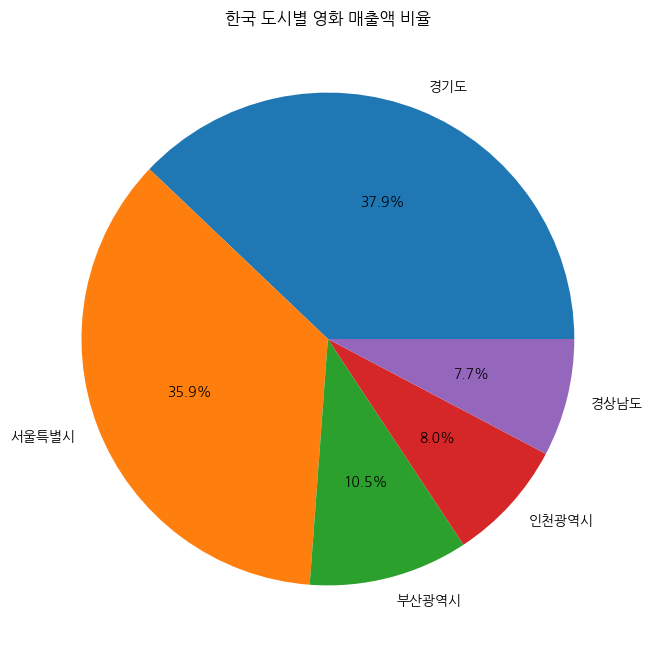

In [ ]:
#상위 5개 지역만 파이차트
dfhead = new_df2022.head()

# 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(dfhead['KOREA_MOVIE_SALES_PRICE'], labels=dfhead['CTPRVN_NM'], autopct='%1.1f%%')
plt.title('한국 도시별 영화 매출액 비율')
plt.show()